<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regional-Averages" data-toc-modified-id="Regional-Averages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regional Averages</a></span></li><li><span><a href="#Trends-for-Foodies" data-toc-modified-id="Trends-for-Foodies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Trends for Foodies</a></span><ul class="toc-item"><li><span><a href="#Suburbs-with-Good-Ratings-at-Reasonable-Costs" data-toc-modified-id="Suburbs-with-Good-Ratings-at-Reasonable-Costs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Suburbs with Good Ratings at Reasonable Costs</a></span></li><li><span><a href="#Expensive-and-Overrated-Suburbs" data-toc-modified-id="Expensive-and-Overrated-Suburbs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Expensive and Overrated Suburbs</a></span></li><li><span><a href="#Top-Rated-Cuisines-and-Where-to-Find-Them" data-toc-modified-id="Top-Rated-Cuisines-and-Where-to-Find-Them-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Top Rated Cuisines and Where to Find Them</a></span></li><li><span><a href="#Top-and-Bottom-Rated-Cuisines-and-Where-to-Find-Them" data-toc-modified-id="Top-and-Bottom-Rated-Cuisines-and-Where-to-Find-Them-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Top and Bottom Rated Cuisines and Where to Find Them</a></span></li><li><span><a href="#Rating-and-Cost-of-Ethnic-Restaurants" data-toc-modified-id="Rating-and-Cost-of-Ethnic-Restaurants-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Rating and Cost of Ethnic Restaurants</a></span></li><li><span><a href="#Rating-and-Cost-of-Non-Ethnic-Restaurants" data-toc-modified-id="Rating-and-Cost-of-Non-Ethnic-Restaurants-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Rating and Cost of Non-Ethnic Restaurants</a></span></li><li><span><a href="#Suburbs-with-the-Most-Variety" data-toc-modified-id="Suburbs-with-the-Most-Variety-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Suburbs with the Most Variety</a></span></li><li><span><a href="#Value-for-Money-at-Certain-Types-of-Places" data-toc-modified-id="Value-for-Money-at-Certain-Types-of-Places-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Value for Money at Certain Types of Places</a></span></li></ul></li><li><span><a href="#Trends-for-Restaurateurs" data-toc-modified-id="Trends-for-Restaurateurs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trends for Restaurateurs</a></span><ul class="toc-item"><li><span><a href="#Type-of-Restaurants-That-Get-The-Most-Votes" data-toc-modified-id="Type-of-Restaurants-That-Get-The-Most-Votes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Type of Restaurants That Get The Most Votes</a></span></li><li><span><a href="#Influence-of-Average-Cost-and-Cuisine-Type-on-Rating" data-toc-modified-id="Influence-of-Average-Cost-and-Cuisine-Type-on-Rating-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Influence of Average Cost and Cuisine Type on Rating</a></span></li><li><span><a href="#Street-level-Trends-for-Cost-and-Cuisine" data-toc-modified-id="Street-level-Trends-for-Cost-and-Cuisine-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Street-level Trends for Cost and Cuisine</a></span></li></ul></li></ul></div>

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

plt.style.use('fivethirtyeight')

pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('datasets/processed/zomato-cape-town-final.csv')
df.head()

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,has_online_delivery,has_table_booking,places,place_type,locality,region,city,latitude,longitude,ward_id,African,American,Arabian,Asian,BBQ,Bakery,Bar Food,Belgian,Beverages,Brazilian,British,Burger,Cafe,Cafe Food,Cape Malay,Caribbean,Chinese,Coffee and Tea,Contemporary,Continental,Cuban,Deli,Desserts,Drinks Only,Durban,Egyptian,Ethiopian,European,Fast Food,Finger Food,Fish and Chips,French,Frozen Yogurt,Fusion,German,Greek,Grill,Healthy Food,Ice Cream,Indian,International,Irish,Italian,Japanese,Juices,Korean,Latin American,Lebanese,Mediterranean,Mexican,Middle Eastern,Modern European,Moroccan,Pakistani,Patisserie,Pizza,Portuguese,Pub Food,Salad,Sandwich,Seafood,South African,Spanish,Steak,Street Food,Sushi,Tapas,Tea,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese
0,The Potluck Club,4.9,Excellent,406,600,4,"European, Contemporary",2,0,0,Old Biscuit Mill,Mall,Woodstock,City Bowl,Cape Town,-33.927589,18.457068,19100015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,La Colombe,4.9,Excellent,146,645,4,"French, Asian",2,0,0,None,None,Constantia,Southern Suburbs,Cape Town,-34.012639,18.402608,19100062,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Moro Gelato,4.8,Excellent,72,80,1,"Desserts, Ice Cream",2,0,0,None,None,CBD,City Bowl,Cape Town,-33.924108,18.417317,19100015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Unframed Ice Cream,4.7,Excellent,104,40,1,Ice Cream,1,0,0,None,None,Gardens,City Bowl,Cape Town,-33.928691,18.412097,19100077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,The Test Kitchen,4.7,Excellent,242,2800,4,"Continental, European",2,0,0,Old Biscuit Mill,Mall,Woodstock,City Bowl,Cape Town,-33.927373,18.456906,19100015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
print("Data shape before removing rows:", df.shape)
df = df[(df.aggregate_rating != 0.0) & (df.average_cost_for_two != 0)]
print("Data shape after removing rows:", df.shape)

Data shape before removing rows: (1354, 91)
Data shape after removing rows: (1258, 91)


In [4]:
def top(df, n=5, column='aggregate_rating'):
    '''Returns the top n rows of data set df ordered desc'''
    return df.sort_values(by=column, ascending=False)[:n]

def bottom(df, n=5, column='aggregate_rating'):
    '''Returns the bottoms n rows of data set df ordered asc'''
    return df.sort_values(by=column, ascending=True)[:n]

def get_stats(group):
    '''Returns the min, max, count and mean summary statistics for a grouped data set'''
    return {'min': group.min(), 'max': group.max(), 'count': group.count(),
            'mean': group.mean(), 'median': group.median(), 'std': group.std()} 

def get_cuisine_cols():
    cols = ["name", "aggregate_rating", "rating_text", "votes", "average_cost_for_two", "price_range", "cuisines", "cuisine_count", "places", "locality", "region", "city", "latitude", "longitude", "has_online_delivery", "has_table_booking", "top_bottom", "place_type", "municipality", "ward_id", "ward_num", "ward_pop", "ward_area", "geometry", "ethnic", "Ethnic"]
    '''Returns the column names of all the cuisine type column, not including the cuisine_count column'''
    cuisine_cols = [col for col in df.columns.tolist() if col not in cols]
    return cuisine_cols 

def get_ethnic_cuisine_cols():
    ethnic = ["African", "American", "Arabian", "Asian", "Belgian", "Brazilian", "British", "Cape Malay", "Caribbean", "Chinese", "Cuban", "Durban", "Egyptian", "Ethiopian", "European", "French", "German", "Greek", "Indian", "Irish", "Italian", "Japanese", "Korean", "Latin American", "Lebanese", "Mediterranean", "Mexican", "Middle Eastern", "Modern European", "Moroccan", "Pakistani", "Portuguese", "South African", "Spanish", "Thai", "Turkish", "Vietnamese"]
    '''Returns the column names of all the cuisine type column, not including the cuisine_count column'''
    ethnic_cols = [col for col in get_cuisine_cols() if col in ethnic]
    return ethnic_cols

def get_non_ethnic_cuisine_cols():
    '''Returns the column names of all the cuisine type column, not including the cuisine_count column'''
    cols = [col for col in get_cuisine_cols() if col not in get_ethnic_cuisine_cols()]
    return cols

# if less than R1K, show as R800 (for eg). If btw R1000 and R999,999, show as R1K or R999K. If R1,000,000 or greater, show as R1M
def currency_formatter(x, pos):
    if x >= 1000000:
        return 'R%1.1fM' % (x * 1e-6)
    elif x < 1000:
        return 'R%1.1d' % (x)
    else:
        return 'R%1.1dK' % (x * 1e-3) 
    
axes_formatter = FuncFormatter(currency_formatter) 

set2_palette = sns.color_palette("Set2")
flatui_palette = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])

# Regional Averages

Text(0.5,1,'Number of Restaurants')

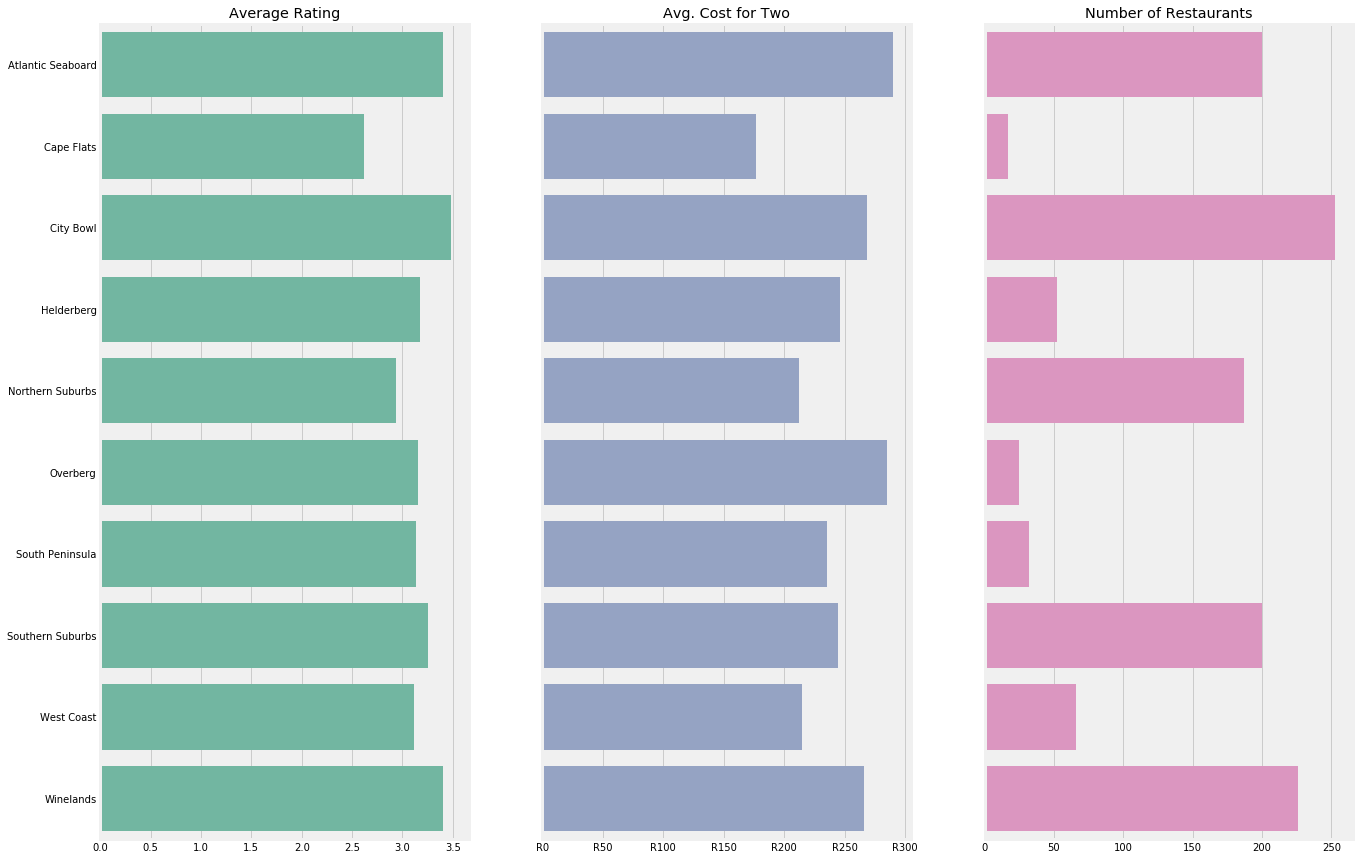

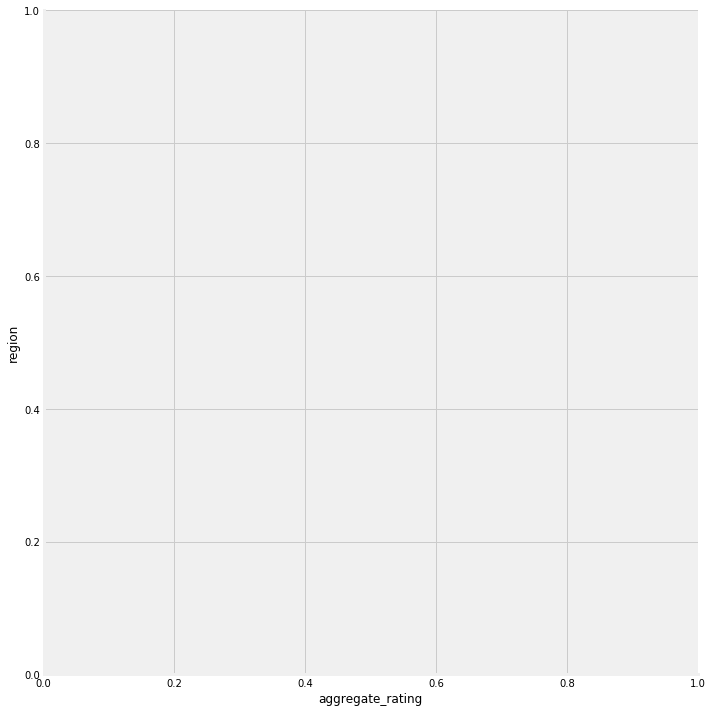

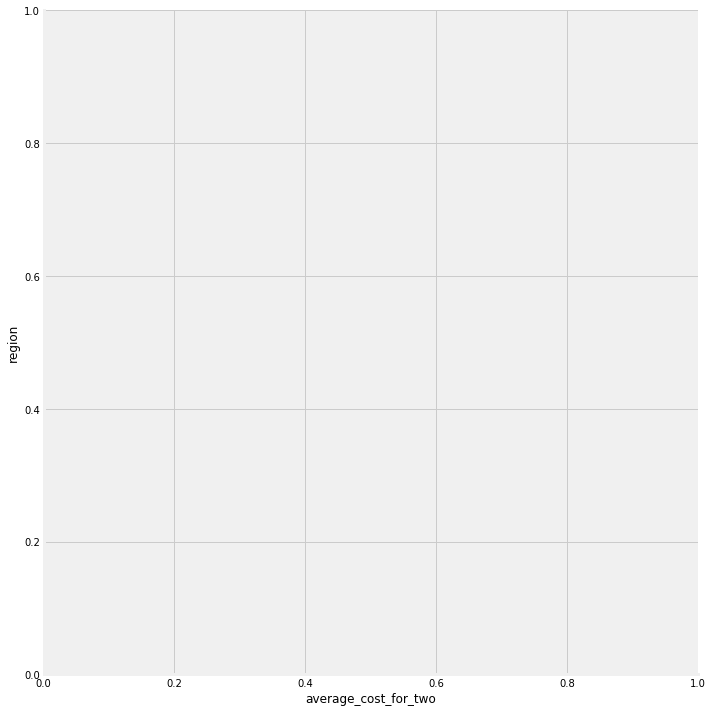

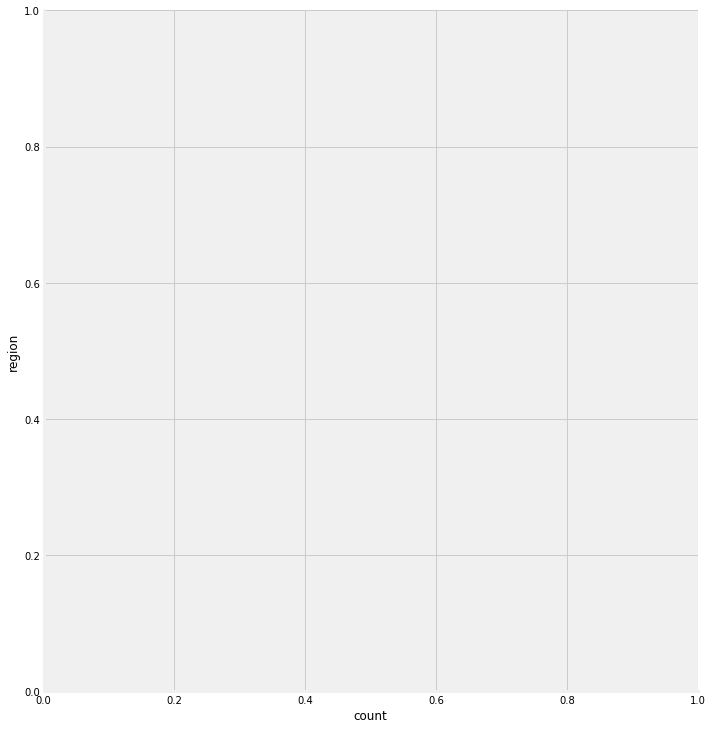

In [5]:
region_order = df.region.value_counts().sort_index().index

fig, ax = plt.subplots(1, 3, figsize=(20,15), sharey=True)

ax1 = ax.ravel()[0]
sns.catplot(kind="bar", x="aggregate_rating", y="region", order=region_order, 
                data=df, ci=None, height=10, aspect=1, ax=ax1, color=set2_palette[0])
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title("Average Rating")
#ax1.legend().set_visible(False)

ax2 = ax.ravel()[1]
sns.catplot(kind="bar", x="average_cost_for_two", y="region", order=region_order, data=df, ci=None, height=10, aspect=1, ax=ax2, color=set2_palette[2])
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title("Avg. Cost for Two")
ax2.xaxis.set_major_formatter(axes_formatter)

ax3 = ax.ravel()[2]
sns.catplot(kind="count", y="region", order=region_order, data=df, ci=None, height=10, aspect=1, ax=ax3, color=set2_palette[3])
ax3.set_xlabel("")
ax3.set_ylabel("")
#ax2.legend(title="Price Range")
ax3.set_title("Number of Restaurants")

# Trends for Foodies

## Suburbs with Good Ratings at Reasonable Costs

In [6]:
df.rating_text.value_counts()

Average      679
Good         306
Very Good    169
Poor          86
Excellent     18
Name: rating_text, dtype: int64

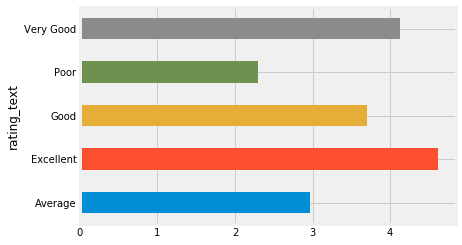

In [7]:
df.pivot_table(index=["rating_text"])["aggregate_rating"].plot.barh()

In [8]:
df.price_range.value_counts()

4    415
2    397
3    331
1    115
Name: price_range, dtype: int64

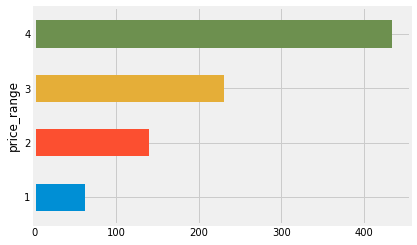

In [9]:
df.pivot_table(index="price_range")["average_cost_for_two"].plot.barh()

In [10]:
# find suburbs with 50% or more good, very good or excellent restaurants
# count total restaurants in suburb, see which have at least 50% count of the top ratings. 
# add the average price for two for these suburbs for these category of restuarts, sort by most expensive to least.

suburb_totals = df.pivot_table(index="locality", values="average_cost_for_two", aggfunc={
    "average_cost_for_two": ["count", "mean"]}).reset_index()
suburb_totals.columns = ["suburb", "total", "avg_cost"]
suburb_totals.avg_cost = np.round(suburb_totals.avg_cost, 2)

row_filter = (df.rating_text == "Good") | (df.rating_text == "Very Good") | (df.rating_text == "Excellent")
suburb_totals_top_rated = df[row_filter].pivot_table(index="locality", values="average_cost_for_two", aggfunc={
    "average_cost_for_two": ["count", "mean"]}).reset_index()
suburb_totals_top_rated.columns = ["suburb", "total_top_rated", "avg_cost_top_rated"]
suburb_totals_top_rated.avg_cost_top_rated = np.round(suburb_totals_top_rated.avg_cost_top_rated, 2)


In [12]:
merged = suburb_totals.merge(suburb_totals_top_rated, how="left", on="suburb")
merged.fillna(0, inplace=True)
merged.total = merged.total.astype(int)
merged.total_top_rated = merged.total_top_rated.astype(int)
merged["%_top"] = merged.total_top_rated/merged.total * 100
merged.sort_values(by="%_top", ascending=False, inplace=True)
merged[(merged.total > 1) & (merged["%_top"] >= 50)]

,suburb,total,avg_cost,total_top_rated,avg_cost_top_rated,%_top
62,Vredehoek,2,240.00,2,240.00,100.000000
25,Kalk Bay,7,260.71,7,260.71,100.000000
10,Constantia,30,426.33,22,503.64,73.333333
66,Wynberg,7,192.86,5,210.00,71.428571
21,Green Point,41,289.02,28,297.32,68.292683
37,Newlands,21,269.81,14,252.86,66.666667
31,Melkbosstrand,3,290.00,2,337.50,66.666667
18,Gardens,47,285.53,30,332.67,63.829787
64,Woodstock,26,359.19,16,454.94,61.538462
59,Tamboerskloof,5,226.00,3,160.00,60.000000


In [13]:
merged.sort_values(by="total", ascending=False)

,suburb,total,avg_cost,total_top_rated,avg_cost_top_rated,%_top
5,CBD,134,253.63,71,279.13,52.985075
55,Stellenbosch,127,263.71,52,338.65,40.944882
61,V & A Waterfront,74,318.30,38,378.42,51.351351
52,Sea Point,48,207.40,20,232.50,41.666667
17,Franschhoek,48,293.83,23,364.52,47.916667
18,Gardens,47,285.53,30,332.67,63.829787
9,Claremont,46,198.04,17,214.41,36.956522
1,Bellville,45,197.67,6,241.67,13.333333
21,Green Point,41,289.02,28,297.32,68.292683
14,Durbanville,39,218.59,13,262.69,33.333333


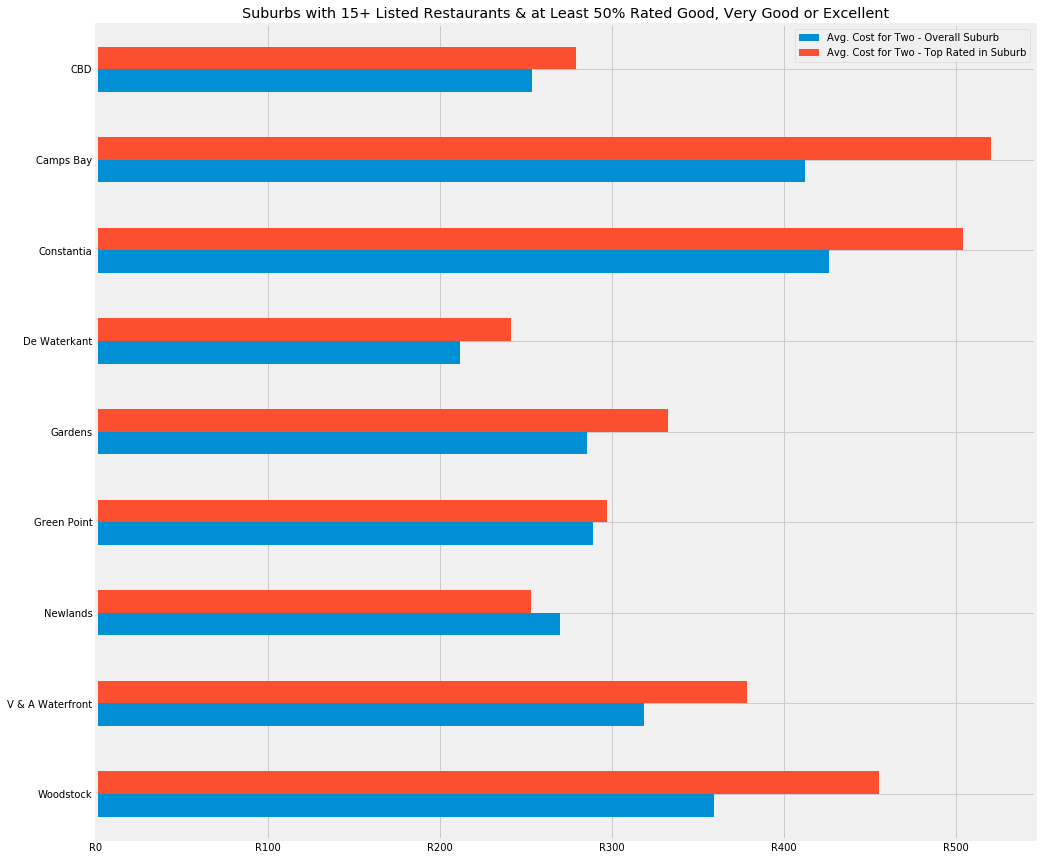

In [14]:
n = 15
top = 50
perc = 100-top

row_filter = (merged.total > n) & (merged["%_top"] >= top)
ax = merged[row_filter].set_index("suburb")[["avg_cost", "avg_cost_top_rated"]].sort_index(ascending=False).plot.barh(figsize=(15, 15))
ax.set_title("Suburbs with " + str(n) + "+ Listed Restaurants & at Least " + str(perc) + "% Rated Good, Very Good or Excellent")
ax.set_ylabel("")
ax.xaxis.set_major_formatter(axes_formatter)

ax.legend(labels=["Avg. Cost for Two - Overall Suburb", "Avg. Cost for Two - Top Rated in Suburb"])

## Expensive and Overrated Suburbs

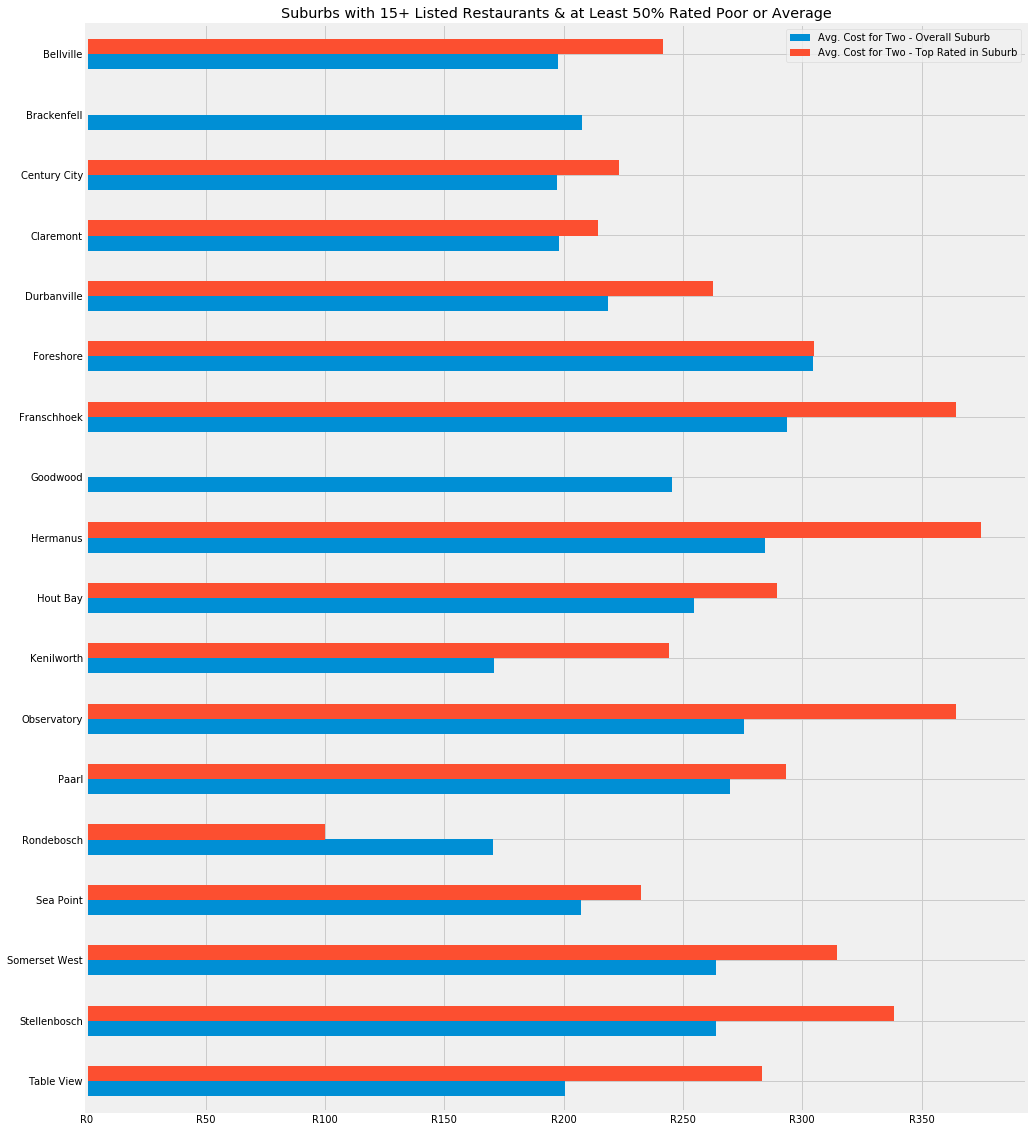

In [15]:
n = 15
top = 50
perc = 100-top

row_filter = (merged.total > n) & (merged["%_top"] < top)
ax = merged[row_filter].set_index("suburb")[["avg_cost", "avg_cost_top_rated"]].sort_index(ascending=False).plot.barh(figsize=(15, 20))
ax.set_title("Suburbs with " + str(n) + "+ Listed Restaurants & at Least " + str(perc) + "% Rated Poor or Average")
ax.set_ylabel("")
ax.xaxis.set_major_formatter(axes_formatter)
ax.legend(labels=["Avg. Cost for Two - Overall Suburb", "Avg. Cost for Two - Top Rated in Suburb"])

## Top Rated Cuisines and Where to Find Them

Text(0.5,0,'Total Restaurants')

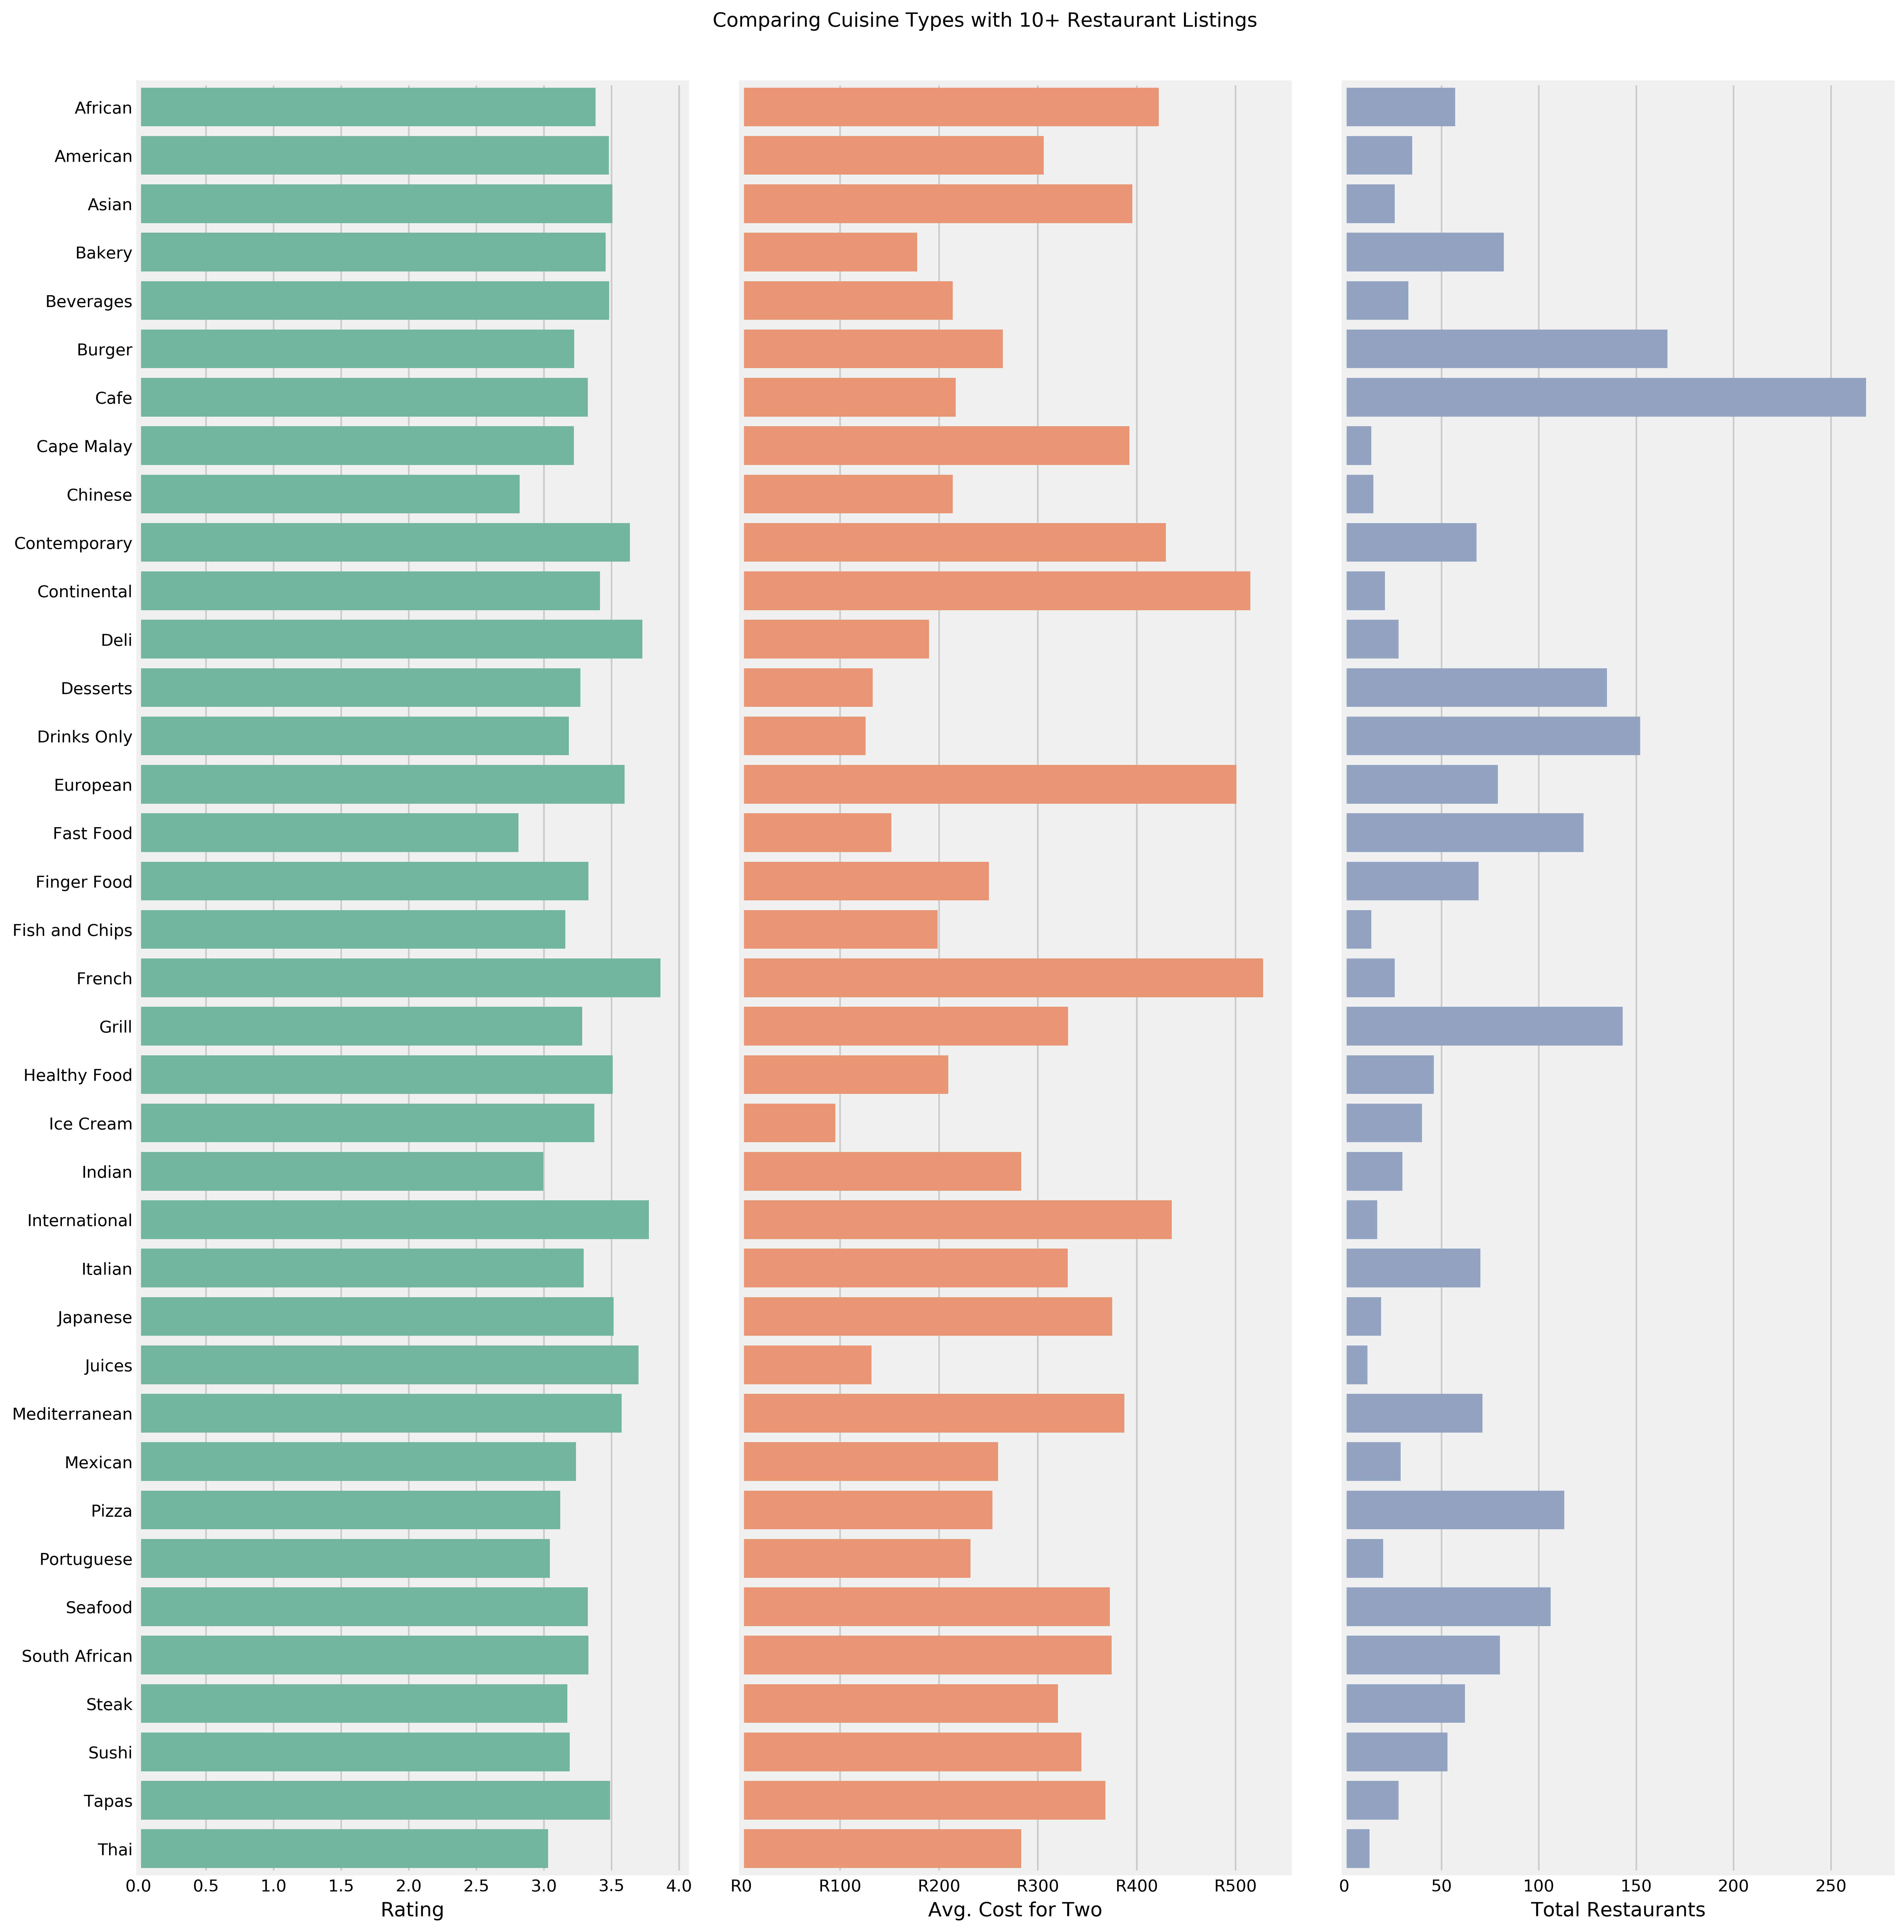

In [16]:
result_rating = {}
result_cost = {}

for cuisine in get_cuisine_cols():    
    result_rating[cuisine] = df[df[cuisine] == 1].pivot_table(index=cuisine, values="aggregate_rating")["aggregate_rating"].values
    result_cost[cuisine] = df[df[cuisine] == 1].pivot_table(index=cuisine, values="average_cost_for_two")["average_cost_for_two"].values
 
cuisine_ratings_df = pd.DataFrame(data=result_rating).T
cuisine_costs_df = pd.DataFrame(data=result_cost).T

df_cuisines = pd.concat([cuisine_ratings_df, cuisine_costs_df, df[get_cuisine_cols()].sum()], axis=1)
df_cuisines.columns = ["rating", "cost", "total"]
#df_ethnic = df_ethnic.sort_values(by="rating", ascending=True)

fig, ax = plt.subplots(1, 3, figsize=(17, 20), dpi=400, sharey=True)
fig.subplots_adjust(wspace=0.1)
plt.suptitle("Comparing Cuisine Types with 10+ Restaurant Listings", y=0.91)
row_filter = (df_cuisines.total >= 10)

ax1 = sns.barplot(data=df_cuisines[row_filter].reset_index(), x="rating", y="index", ax=ax.ravel()[0], color=set2_palette[0])
ax1.set_xlabel("Rating")
ax1.set_ylabel("")
#ax1.set_title("Ratings for Cuisine Types")

ax2 = sns.barplot(data=df_cuisines[row_filter].reset_index(), x="cost", y="index", ax=ax.ravel()[1], color=set2_palette[1])
ax2.set_xlabel("Avg. Cost for Two")
ax2.set_ylabel("")
ax2.xaxis.set_major_formatter(axes_formatter)
#ax2.set_title("Ratings for Cuisine Types")

ax3 = sns.barplot(data=df_cuisines[row_filter].reset_index(), x="total", y="index", ax=ax.ravel()[2], color=set2_palette[2])
ax3.set_ylabel("")
ax3.set_xlabel("Total Restaurants")

## Top and Bottom Rated Cuisines and Where to Find Them
- Suburbs must have 5 or more of this type of restaurant, otherwise data is skewed.
- We'll find the 10 types of cuisines that the most and least votes and then find the top and bottom 5 suburbs for each of them.

In [30]:
result_rating = {}
result_cost = {}
result_votes = {}

for cuisine in get_cuisine_cols():    
    result_rating[cuisine] = df[df[cuisine] == 1].pivot_table(index=cuisine, values="aggregate_rating")["aggregate_rating"].values
    result_cost[cuisine] = df[df[cuisine] == 1].pivot_table(index=cuisine, values="average_cost_for_two")["average_cost_for_two"].values
    result_votes[cuisine] = df[df[cuisine] == 1].pivot_table(index=cuisine, values="votes")["votes"].values
 
cuisine_ratings_df = pd.DataFrame(data=result_rating).T
cuisine_costs_df = pd.DataFrame(data=result_cost).T
cuisine_votes_df = pd.DataFrame(data=result_votes).T

df_cuisines = pd.concat([cuisine_votes_df, cuisine_ratings_df, cuisine_costs_df, df[get_cuisine_cols()].sum()], axis=1)
df_cuisines.columns = ["votes", "rating", "cost", "total"]

In [38]:
# find top rated cuisine types, display the top 5 suburbs for these cuisines. 
most_voted_cuisines = df_cuisines[df_cuisines.total > 4].sort_values(by="votes", ascending=False).head(10)
least_voted_cuisines = df_cuisines[df_cuisines.total > 4].sort_values(by="votes", ascending=False).tail(10)

In [39]:
most_voted_cuisines

,votes,rating,cost,total
Japanese,164.263158,3.515789,375.263158,19
Asian,130.461538,3.507692,395.730769,26
Sushi,114.037736,3.190566,344.000000,53
Seafood,95.377358,3.325472,372.915094,106
American,92.114286,3.480000,305.857143,35
Mexican,91.758621,3.237931,259.827586,29
German,86.428571,3.500000,287.142857,7
Mediterranean,85.380282,3.574648,387.521127,71
Grill,80.426573,3.283217,330.650350,143
Deli,79.000000,3.728571,190.000000,28


In [40]:
least_voted_cuisines

,votes,rating,cost,total
Lebanese,47.200000,2.480000,144.000000,5
African,44.771930,3.380702,422.385965,57
Indian,44.133333,2.996667,283.300000,30
Portuguese,41.500000,3.045000,232.000000,20
Ice Cream,39.325000,3.372500,95.250000,40
Desserts,39.274074,3.269630,133.029630,135
Durban,33.000000,3.000000,171.428571,7
Street Food,22.200000,3.280000,151.000000,5
Fast Food,20.040650,2.811382,151.951220,123
Drinks Only,12.901316,3.184868,125.723684,152


In [58]:
# for each of top 10 cuisines, show the top 5 and bottom 5 suburbs for these

result = {}

for cuisine in get_cuisine_cols():    
    result[cuisine] = df[df[cuisine] == 1].pivot_table(index=[cuisine, "locality"])[["aggregate_rating", "average_cost_for_two"]]

    
fig, ax = plt.subplots(len(top10_cuisines)//2, 2, figsize=(15, 25), sharex=True, dpi=400)
plt.suptitle("Top & Bottom Rated Suburbs for Cuisines With Most Votes", x=0.45, y=0.92)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

count = 0
colour_count = 0
for cuisine, ax in zip(most_voted_cuisines.index, ax.ravel()):
    temp = result[cuisine].pivot_table(index="locality").sort_values(by="aggregate_rating", ascending=False)   
    top = temp.head(5)["aggregate_rating"]
    bottom = temp.tail(5)["aggregate_rating"]
    #ax = pd.concat([top, bottom]).sort_index(ascending=False).plot.barh(ax=ax)
    ax = sns.barplot(data=pd.concat([top, bottom]).reset_index(), x="aggregate_rating", y="locality", ax=ax,
                    color=set2_palette[colour_count])
    ax.set_ylabel("")
    ax.set_title(cuisine)
    ax.set_xlabel("")
    if (count == 8) | (count == 9):
        ax.set_xlabel("Rating")
    count += 1
    if colour_count == 7:
        colour_count = 0
    else:
        colour_count += 1

## Rating and Cost of Ethnic Restaurants

In [ ]:
def mark_ethnic(row):
    ethnic_cols = ["African", "American", "Arabian", "Asian", "Belgian", "Brazilian", "British", "Cape Malay", "Caribbean", "Chinese", "Cuban", "Durban", "Egyptian", "Ethiopian", "European", "French", "German", "Greek", "Indian", "Irish", "Italian", "Japanese", "Korean", "Latin American", "Lebanese", "Mediterranean", "Mexican", "Middle Eastern", "Modern European", "Moroccan", "Pakistani", "Portuguese", "South African", "Spanish", "Thai", "Turkish", "Vegetarian"]
    for col in ethnic_cols:
        if row[col] == 1:
            return "Yes"
    return "No"
    
df["Ethnic"] = df.apply(mark_ethnic, axis=1)
df.head(10)

In [ ]:
sns.barplot(data=df[df.Ethnic=="Yes"].rating_text.value_counts().reset_index(), x="rating_text", y="index", order=["Poor", "Average", "Good", "Very Good", "Excellent"])

In [ ]:
sns.barplot(data=df[df.Ethnic=="No"].rating_text.value_counts().reset_index(), x="rating_text", y="index", order=["Poor", "Average", "Good", "Very Good", "Excellent"])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=400)
ax = sns.scatterplot(data=df[df.average_cost_for_two < 2000], x="average_cost_for_two", y="aggregate_rating", hue="Ethnic", palette=set2_palette[:2], ax=ax)
ax.set_ylabel("")
ax.set_xlabel("")
ax.xaxis.set_major_formatter(axes_formatter)
ax.set_title("Ethnic Restaurants - Rating vs Avg. Cost for Two")

In [ ]:
ethnic = df[df.Ethnic == "Yes"]

result_rating = {}
result_cost = {}

for cuisine in get_ethnic_cuisine_cols():    
    result_rating[cuisine] = ethnic[ethnic[cuisine] == 1].pivot_table(index=cuisine, values="aggregate_rating")["aggregate_rating"].values
    result_cost[cuisine] = ethnic[ethnic[cuisine] == 1].pivot_table(index=cuisine, values="average_cost_for_two")["average_cost_for_two"].values
 
cuisine_ratings_df = pd.DataFrame(data=result_rating).T
cuisine_costs_df = pd.DataFrame(data=result_cost).T

df_ethnic = pd.concat([cuisine_ratings_df, cuisine_costs_df, ethnic[get_ethnic_cuisine_cols()].sum()], axis=1)
df_ethnic.columns = ["rating", "cost", "total"]
#df_ethnic = df_ethnic.sort_values(by="rating", ascending=True)

fig, ax = plt.subplots(1, 3, figsize=(20, 15), dpi=400, sharey=True)
fig.subplots_adjust(wspace=0.1)
plt.suptitle("Comparing Ethnic Restaurants", y=0.92)

ax1 = sns.barplot(data=df_ethnic[df_ethnic.total > 0].reset_index(), x="rating", y="index", ax=ax.ravel()[0], color=set2_palette[0])
ax1.set_xlabel("Rating")
ax1.set_ylabel("")
#ax1.set_title("Ratings for Cuisine Types")

ax2 = sns.barplot(data=df_ethnic[df_ethnic.total > 0].reset_index(), x="cost", y="index", ax=ax.ravel()[1], color=set2_palette[1])
ax2.set_xlabel("Avg. Cost for Two")
ax2.set_ylabel("")
ax2.xaxis.set_major_formatter(axes_formatter)
#ax2.set_title("Ratings for Cuisine Types")

ax3 = sns.barplot(data=df_ethnic[df_ethnic.total > 0].reset_index(), x="total", y="index", ax=ax.ravel()[2], color=set2_palette[2])
ax3.set_ylabel("")
ax3.set_xlabel("Total Restaurants")

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15), dpi=400, sharey=True)
fig.subplots_adjust(wspace=0.1)
plt.suptitle("Ethnic Cuisine Types with 5+ Listing & Rating 3.5 or Greater", y=0.92)
row_filter = (df_ethnic.total >= 5) & (df_ethnic.rating >= 3.5)

ax1 = sns.barplot(data=df_ethnic[row_filter].reset_index(), x="rating", y="index", ax=ax.ravel()[0], color=set2_palette[0])
ax1.set_xlabel("Rating")
ax1.set_ylabel("")
#ax1.set_title("Ratings for Cuisine Types")

ax2 = sns.barplot(data=df_ethnic[row_filter].reset_index(), x="cost", y="index", ax=ax.ravel()[1], color=set2_palette[1])
ax2.set_xlabel("Avg. Cost for Two")
ax2.set_ylabel("")
ax2.xaxis.set_major_formatter(axes_formatter)
#ax2.set_title("Ratings for Cuisine Types")

ax3 = sns.barplot(data=df_ethnic[row_filter].reset_index(), x="total", y="index", ax=ax.ravel()[2], color=set2_palette[2])
ax3.set_ylabel("")
ax3.set_xlabel("Total Restaurants")

## Rating and Cost of Non-Ethnic Restaurants

In [ ]:
non_ethnic = df[df.Ethnic == "No"]

result_rating = {}
result_cost = {}

for cuisine in get_non_ethnic_cuisine_cols():   
    if non_ethnic[non_ethnic[cuisine] == 1].shape[0] > 0:
        result_rating[cuisine] = non_ethnic[non_ethnic[cuisine] == 1].pivot_table(index=cuisine, values="aggregate_rating")["aggregate_rating"].values
        result_cost[cuisine] = non_ethnic[non_ethnic[cuisine] == 1].pivot_table(index=cuisine, values="average_cost_for_two")["average_cost_for_two"].values
cuisine_ratings_df = pd.DataFrame(data=result_rating).T
cuisine_costs_df = pd.DataFrame(data=result_cost).T

df_non_ethnic = pd.concat([cuisine_ratings_df, cuisine_costs_df, non_ethnic[get_non_ethnic_cuisine_cols()].sum()], axis=1)
df_non_ethnic.columns = ["rating", "cost", "total"]
#df_ethnic = df_ethnic.sort_values(by="rating", ascending=True)

fig, ax = plt.subplots(1, 3, figsize=(20, 15), dpi=400, sharey=True)
fig.subplots_adjust(wspace=0.1)
plt.suptitle("Comparing Non-Ethnic Restaurants", y=0.92)

ax1 = sns.barplot(data=df_non_ethnic[df_non_ethnic.total > 0].reset_index(), x="rating", y="index", ax=ax.ravel()[0], color=set2_palette[0])
ax1.set_xlabel("Rating")
ax1.set_ylabel("")
#ax1.set_title("Ratings for Cuisine Types")

ax2 = sns.barplot(data=df_non_ethnic[df_non_ethnic.total > 0].reset_index(), x="cost", y="index", ax=ax.ravel()[1], color=set2_palette[1])
ax2.set_xlabel("Avg. Cost for Two")
ax2.set_ylabel("")
ax2.xaxis.set_major_formatter(axes_formatter)
#ax2.set_title("Ratings for Cuisine Types")

ax3 = sns.barplot(data=df_non_ethnic[df_non_ethnic.total > 0].reset_index(), x="total", y="index", ax=ax.ravel()[2], color=set2_palette[2])
ax3.set_ylabel("")
ax3.set_xlabel("Total Restaurants")

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15), dpi=400, sharey=True)
fig.subplots_adjust(wspace=0.1)
plt.suptitle("Non-Ethnic Cuisine Types with 5+ Listing & Rating 3.5 or Greater", y=0.92)
row_filter = (df_non_ethnic.total >= 5) & (df_non_ethnic.rating >= 3.5)

ax1 = sns.barplot(data=df_non_ethnic[row_filter].reset_index(), x="rating", y="index", ax=ax.ravel()[0], color=set2_palette[0])
ax1.set_xlabel("Rating")
ax1.set_ylabel("")
#ax1.set_title("Ratings for Cuisine Types")

ax2 = sns.barplot(data=df_non_ethnic[row_filter].reset_index(), x="cost", y="index", ax=ax.ravel()[1], color=set2_palette[1])
ax2.set_xlabel("Avg. Cost for Two")
ax2.set_ylabel("")
ax2.xaxis.set_major_formatter(axes_formatter)
#ax2.set_title("Ratings for Cuisine Types")

ax3 = sns.barplot(data=df_non_ethnic[row_filter].reset_index(), x="total", y="index", ax=ax.ravel()[2], color=set2_palette[2])
ax3.set_ylabel("")
ax3.set_xlabel("Total Restaurants")

## Suburbs with the Most Variety
- Variety means the total count of available cuisines in that suburb

In [ ]:
# find the number of unique cuisine types on offer in each suburb, join this with cost and rating
# group data by locality then check whether the average for a cuisine type > 0, if so, add that cuisine to its variety total.
def get_suburb_variety(row):
    total = 0
    for col in get_cuisine_cols():
        if row[col] > 0:
            total += 1
    return total
    
suburbs = df.pivot_table(index="locality")
suburbs["variety_count"] = suburbs.apply(get_suburb_variety, axis=1)
suburbs.head(10)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(17, 20), sharey=True, dpi=400)
plt.suptitle("Suburbs with at Least 10 Varieties of Cuisine", y=0.92, x=0.44)

row_filter = (suburbs.variety_count >= 10)

ax1 = sns.barplot(data=suburbs[row_filter].reset_index(), x="variety_count", y="locality", color=set2_palette[3], ax=ax.ravel()[0])
ax1.set_xlabel("Variety of Cuisines")
ax1.set_ylabel("")

ax2 = sns.barplot(data=suburbs[row_filter].reset_index(), x="aggregate_rating", y="locality", color=set2_palette[0], ax=ax.ravel()[1])
ax2.set_xlabel("Rating")
ax2.set_ylabel("")

ax3 = sns.barplot(data=suburbs[row_filter].reset_index(), x="average_cost_for_two", y="locality", color=set2_palette[1], ax=ax.ravel()[2])
ax3.set_xlabel("Avg. Cost for Two")
ax3.xaxis.set_major_formatter(axes_formatter)
ax3.set_ylabel("")


## Value for Money at Certain Types of Places

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=400)
row_filter = (df.average_cost_for_two < 2000) & ((df.place_type == "Mall") | (df.place_type == "Hotel") | (df.place_type == "Wine"))
ax = sns.scatterplot(data=df[row_filter], x="average_cost_for_two", y="aggregate_rating", hue="place_type",  ax=ax)
ax.set_ylabel("")
ax.set_xlabel("")
ax.xaxis.set_major_formatter(axes_formatter)
ax.set_title("Comparing Ratings and Avg. Cost for Two at Different Places")

# Trends for Restaurateurs

## Type of Restaurants That Get The Most Votes

In [ ]:
result_rating = {}
result_cost = {}
result_votes = {}

for cuisine in get_cuisine_cols():    
    result_rating[cuisine] = df[df[cuisine] == 1].pivot_table(index=cuisine, values="aggregate_rating")["aggregate_rating"].values
    result_cost[cuisine] = df[df[cuisine] == 1].pivot_table(index=cuisine, values="average_cost_for_two")["average_cost_for_two"].values
    result_votes[cuisine] = df[df[cuisine] == 1].pivot_table(index=cuisine, values="votes")["votes"].values
 
cuisine_ratings_df = pd.DataFrame(data=result_rating).T
cuisine_costs_df = pd.DataFrame(data=result_cost).T
cuisine_votes_df = pd.DataFrame(data=result_votes).T

df_cuisines = pd.concat([cuisine_votes_df, cuisine_ratings_df, cuisine_costs_df, df[get_cuisine_cols()].sum()], axis=1)
df_cuisines.columns = ["votes", "rating", "cost", "total"]
#df_ethnic = df_ethnic.sort_values(by="rating", ascending=True)

fig, ax = plt.subplots(1, 4, figsize=(17, 20), dpi=400, sharey=True)
fig.subplots_adjust(wspace=0.2)
plt.suptitle("Comparing Vote Count for Cuisines with 10+ Listings", y=0.91)
row_filter = (df_cuisines.total >= 10)

ax1 = sns.barplot(data=df_cuisines[row_filter].reset_index(), x="votes", y="index", ax=ax.ravel()[0], color=set2_palette[0])
ax1.set_xlabel("Avg. Number Votes")
ax1.set_ylabel("")
#ax1.set_title("Ratings for Cuisine Types")

ax2 = sns.barplot(data=df_cuisines[row_filter].reset_index(), x="rating", y="index", ax=ax.ravel()[1], color=set2_palette[1])
ax2.set_xlabel("Rating")
ax2.set_ylabel("")
#ax2.set_title("Ratings for Cuisine Types")

ax3 = sns.barplot(data=df_cuisines[row_filter].reset_index(), x="cost", y="index", ax=ax.ravel()[2], color=set2_palette[2])
ax3.set_ylabel("")
ax3.set_xlabel("Avg. Cost for Two")
ax3.xaxis.set_major_formatter(axes_formatter)

ax4 = sns.barplot(data=df_cuisines[row_filter].reset_index(), x="total", y="index", ax=ax.ravel()[3], color=set2_palette[3])
ax4.set_ylabel("")
ax4.set_xlabel("Number of Restaurants")

## Influence of Average Cost and Cuisine Type on Rating

## Street-level Trends for Cost and Cuisine